In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
from tqdm.auto import tqdm # lib for progress bar

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
# Dataset
train_data = datasets.FashionMNIST(
    root="data", # where to download?
    train=True, # training vs test
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data", # where to download?
    train=False, # training vs test
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26421880/26421880 [00:03<00:00, 7925074.52it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 166987.10it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3032454.85it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21506251.98it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
len(train_data),len(test_data)

(60000, 10000)

In [7]:
# See the training data
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Text(0.5, 1.0, '9')

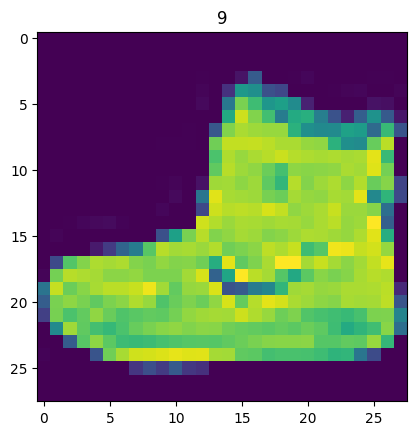

In [12]:
# Visualize images
plt.imshow(image.permute(1,2,0))
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

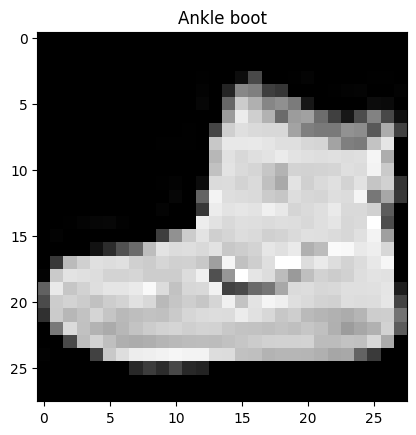

In [13]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

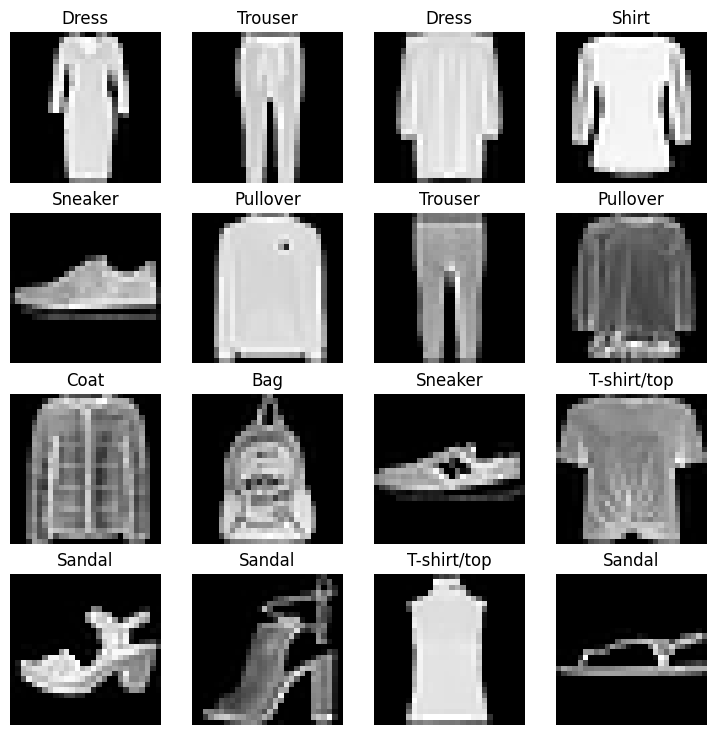

In [14]:
# Plot more images
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0,len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [15]:
# Prepare DataLoader to batch the data and shuffle it (more computantionally efficient)
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    pin_memory=True
)
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    pin_memory=True
)

In [16]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f14604663e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f14669fd420>)

In [17]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f14604663e0>, <torch.utils.data.dataloader.DataLoader object at 0x7f14669fd420>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [18]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

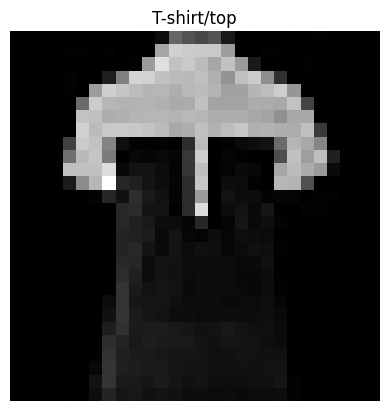

In [19]:
# Show a sample
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [20]:
# Create a baseline model (start simply and add complexitiy when necessary)

# Create a flat layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [21]:
# 1. baseline model - only linear layers
# 2. v1 model - ReLU layers added
# 3. v2 model - Convolutional blocks added

# Only linear layers
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
    )

  def forward(self, x):
    return self.layer_stack(x)

# Add ReLU layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

# Add convolutional and max-pool layers and classifier
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv-layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        # Create a conv-layer
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there is a trick to calculate correct value here (print shapes of conv layers of conv layers and adjust "in_features" in classifier when error is thrown)
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape) #----- prints for adjusting values
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [22]:
torch.manual_seed(42)

# model_0 = FashionMNISTModelV2(
#     input_shape=784, # 28*28
#     hidden_units=10,
#     output_shape=len(class_names)
# ).to(device)

model_0 = FashionMNISTModelV2(
    input_shape=1, # 28*28
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_0

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [23]:
# Example for model of v0
# dummy_x = torch.rand([1,1,28,28]).to(device)
# model_0(dummy_x)

In [24]:
# Set criterion and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    params=model_0.parameters(),
    lr=0.01
)

In [25]:
# Get helper_functions.py (for accuracy calculation)

import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

In [26]:
# Create a function to time our experiments

from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """
    Prints difference between start and end time.
  """

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### Update: create a training and testing loop functions


In [27]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               criterion: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a training step trying to learn on data_loader."""
  train_loss, train_acc = 0, 0
  model.train()

  # 1 Epoch - train on a batch
  for batch, (X,y) in enumerate(data_loader):
    # Move data to target device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model(X)

    # Loss calculation
    loss = criterion(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # Zero grad
    optimizer.zero_grad()

    # Backprop
    loss.backward()

    # Step
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [28]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               criterion: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a testing step on data_loader."""
  test_loss, test_acc = 0, 0

  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      # Move data to target device
      X, y = X.to(device), y.to(device)
      # Forward pass
      test_pred = model(X)
      # Calc loss (accumlatively)
      test_loss += criterion(test_pred, y)
      # Calc accuracy
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Calc test loss per batch
    test_loss /= len(data_loader)

    # Calc test accuracy per batch
    test_acc /= len(data_loader)

  # Print the values
  print(f"\nTest loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [29]:
# Set seed and start timer
torch.manual_seed(42)
train_time_start = timer()

# Training and testing loops
epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n----------")

  ### Training
  train_step(model=model_0,
             data_loader=train_dataloader,
             criterion=criterion,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  ### Testing
  test_step(model=model_0,
             data_loader=test_dataloader,
             criterion=criterion,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

# Calculate training time
train_time_end = timer()
total_train_time = print_train_time(train_time_start,
                                    train_time_end,
                                    device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 
----------
Train loss: 0.49222 | Train acc: 82.07%

Test loss: 0.40010 | Test acc: 85.68%
Epoch: 1 
----------
Train loss: 0.37939 | Train acc: 86.02%

Test loss: 0.39553 | Test acc: 85.92%
Epoch: 2 
----------
Train loss: 0.35626 | Train acc: 86.96%

Test loss: 0.38139 | Test acc: 85.97%
Epoch: 3 
----------
Train loss: 0.34997 | Train acc: 87.10%

Test loss: 0.37805 | Test acc: 86.19%
Epoch: 4 
----------
Train loss: 0.35095 | Train acc: 87.16%

Test loss: 0.37349 | Test acc: 86.42%
Epoch: 5 
----------
Train loss: 0.34692 | Train acc: 87.37%

Test loss: 0.37620 | Test acc: 86.35%
Epoch: 6 
----------
Train loss: 0.34725 | Train acc: 87.33%

Test loss: 0.36532 | Test acc: 86.68%
Epoch: 7 
----------
Train loss: 0.34111 | Train acc: 87.53%

Test loss: 0.36500 | Test acc: 86.83%
Epoch: 8 
----------
Train loss: 0.33979 | Train acc: 87.58%

Test loss: 0.37811 | Test acc: 86.25%
Epoch: 9 
----------
Train loss: 0.34005 | Train acc: 87.58%

Test loss: 0.41335 | Test acc: 85.13%


**Note:** Sometimes training time on CPU is faster than on GPU

1. Overhead for copying data/model to and from the GPU outweights the compute benefit offered by the GPU
2. The hardware has a better CPU in terms of compute capability than the GPU

In [30]:
# Develop evaluation function
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               criterion: torch.nn.Module,
               accuracy_fn):
  """
    Returns a dictionary containing the results of model predicting on data_loader
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Move data to target device
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model_0(X)

      # Accumulate the loss and accuracy per batch
      loss += criterion(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find average values per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model results
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             criterion=criterion,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.41335123777389526,
 'model_acc': 85.13378594249201}

In [31]:
# Visualize our model results
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logits = model(sample)

      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      pred_probs.append(pred_prob.to("cpu"))

  return torch.stack(pred_probs)


In [32]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# Make predictions
pred_probs = make_predictions(model=model_0,
                              data=test_samples)

# View prediction probabilities
pred_classes = pred_probs.argmax(dim=1)

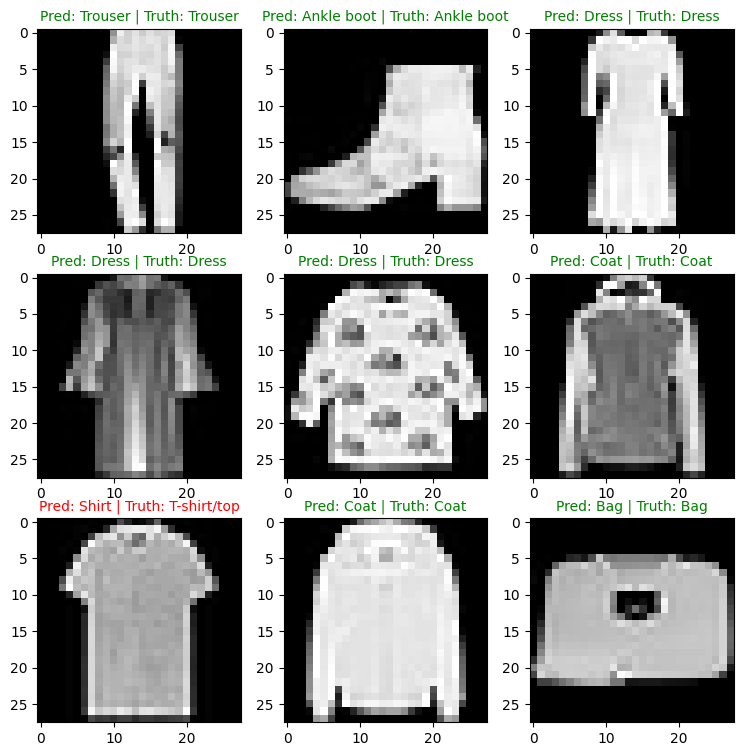

In [33]:
# Plot predictions vs labels
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap = "gray")

  # Get prediction
  pred_label = class_names[pred_classes[i]]

  # Get truth label
  truth_label = class_names[test_labels[i]]

  # Create a title
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")